# Geospatial and Statistical Analysis of Brazilian E-Commerce v1

This is modification of kernel
https://www.kaggle.com/andresionek/geospatial-analysis-of-brazilian-e-commerce
by Andre Sionek

### Added Statistical Analysis

* Sorted index of sales per states
* Sorted index of sales per cities

#### Various modifications of Geospatial Analysis

----

Olist has released a dataset with 100k orders made between 2016 and 2018. Each order has some information about the customer and contains the first three digits of the customer zip code. Olist has also released a geolocation database that has 323k lat/lng coordinates related to the first three digits of each zip code.

## CEP: the Brazilian Zip Code
A brazilian zip code, also know as CEP, stands for Postal Adressing Code (*Código de Endereçamento Postal*) and contains 8 digits. Introduced in 1972 as a sequence of five digits, it was expanded to eight digits in 1992 to allow for more precise localization. The standard format is "nnnnn-nnn" (the original five digits, an hyphen, and the new three digits).

**CEP:** 12.345-678

Most cities with population around 100,000 and above have a CEP assigned to every public place and to some high-occupancy private spaces, like major commercial buildings and large residential condos. Small towns are assigned a general 5-digit code followed by the suffix -000. 

* the first part is composed by 5 digits that represent Region, Subregion, Sector, Subsector and Subsector Splitter.
* the second part contain 3 digits, separated by an hyphen from the first, and it represents the Distribution Identifiers.

More info about how CEP works may be found at the [Correios website](https://www.correios.com.br/a-a-z/cep-codigo-de-enderecamento-postal).

Lets look at the geolocation dataset provided by Olist and try to understand how CEP works geographically.

In [25]:
import os
os.listdir("../input")

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [26]:
import numpy as np
import pandas as pd 

geo = pd.read_csv("../input/olist_geolocation_dataset.csv")
geo.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


There are 851 different zip_code_prefix. They are all limited to 500 samples per zip_code_prefix. On average there are 380 coordinates for each prefix.

### Index of sales per state

In [27]:
geolocation_state = geo['geolocation_state']
uniqueGs, countsGs = np.unique(geolocation_state, return_counts=True)
geolocation_state_index = np.asarray((uniqueGs, countsGs)).T

geolocation_state_index_sorted = geolocation_state_index[geolocation_state_index[:,1].argsort()[::-1]]

print ("Sorted Geolocation State Index")
print(geolocation_state_index_sorted)

Sorted Geolocation State Index
[['SP' 404268]
 ['MG' 126336]
 ['RJ' 121169]
 ['RS' 61851]
 ['PR' 57859]
 ['SC' 38328]
 ['BA' 36045]
 ['GO' 20139]
 ['ES' 16748]
 ['PE' 16432]
 ['DF' 12986]
 ['MT' 12031]
 ['CE' 11674]
 ['PA' 10853]
 ['MS' 10431]
 ['MA' 7853]
 ['PB' 5538]
 ['RN' 5041]
 ['PI' 4549]
 ['AL' 4183]
 ['TO' 3576]
 ['SE' 3563]
 ['RO' 3478]
 ['AM' 2432]
 ['AC' 1301]
 ['AP' 853]
 ['RR' 646]]


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

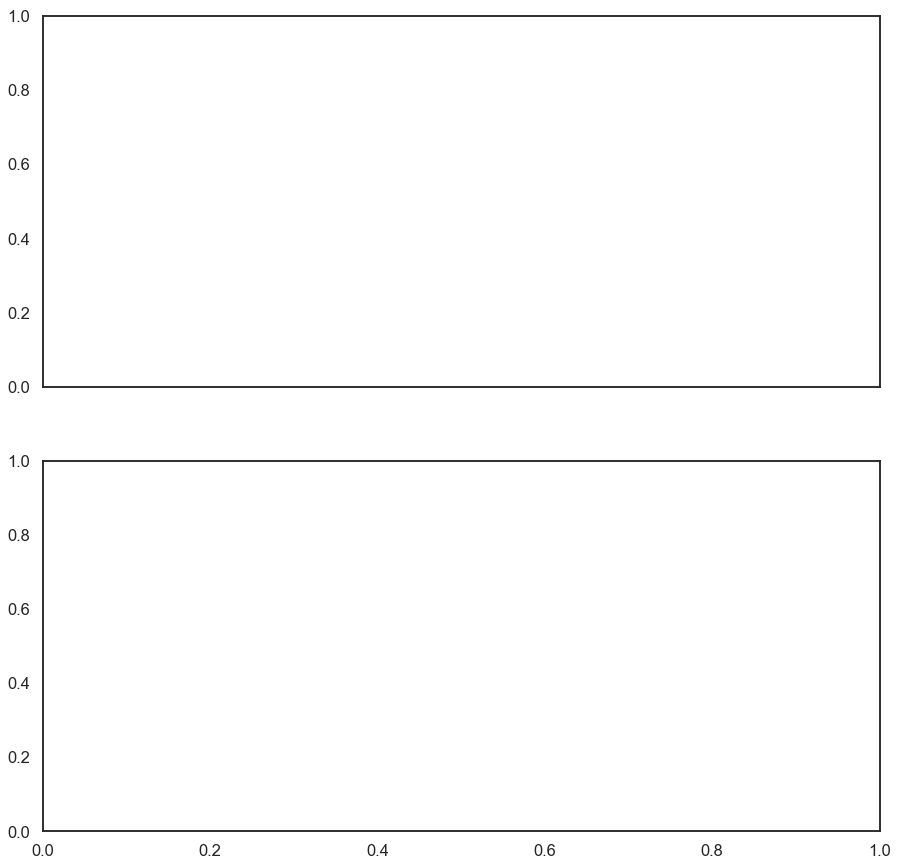

In [29]:
"""
Color palette choices
=====================

"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

# Generate some sequential data
#data[:, [0]]
# np.mean(a, axis=0)

x = np.array(geolocation_state_index_sorted[:, [0]])
y1 = np.array(geolocation_state_index_sorted[:, [1]])
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
x = np.array(geolocation_state_index_sorted[:, [0]])
y2 = y1 - np.mean(geolocation_state_index_sorted, axis=0)
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")




### Index of sales per city

In [9]:
geolocation_city = geo['geolocation_city']
uniqueGc, countGc = np.unique(geolocation_city, return_counts=True)
geolocation_city_index = np.array((uniqueGc, countGc)).T

# Sorting
geolocation_city_index_sorted = geolocation_city_index[geolocation_city_index[:,1].argsort()[::-1]]
# Top 100 cities

print ("#100 cities sorted by sales per city")
print(geolocation_city_index_sorted[0:100,:])


#100 cities sorted by sales per city
[['sao paulo' 135800]
 ['rio de janeiro' 62151]
 ['belo horizonte' 27805]
 ['são paulo' 24918]
 ['curitiba' 16593]
 ['porto alegre' 13521]
 ['salvador' 11865]
 ['guarulhos' 11340]
 ['brasilia' 10470]
 ['sao bernardo do campo' 8112]
 ['osasco' 7658]
 ['santo andre' 6863]
 ['niteroi' 6534]
 ['recife' 6168]
 ['goiania' 5661]
 ['fortaleza' 5538]
 ['campinas' 5479]
 ['sorocaba' 5361]
 ['santos' 5000]
 ['barueri' 4971]
 ['juiz de fora' 4679]
 ['contagem' 4395]
 ['campo grande' 4332]
 ['ribeirao preto' 4187]
 ['florianopolis' 4148]
 ['nova iguacu' 4022]
 ['mogi das cruzes' 3913]
 ['belem' 3789]
 ['sao jose dos campos' 3759]
 ['sao goncalo' 3601]
 ['uberlandia' 3520]
 ['vitoria' 3478]
 ['duque de caxias' 3444]
 ['bauru' 3270]
 ['sao jose do rio preto' 3190]
 ['londrina' 3144]
 ['carapicuiba' 3041]
 ['diadema' 2986]
 ['praia grande' 2952]
 ['joinville' 2922]
 ['campos dos goytacazes' 2840]
 ['maua' 2651]
 ['maringa' 2514]
 ['sao luis' 2506]
 ['sao caetano do

array(['geolocation_state'], dtype='<U17')

There are some outliers coordinates in the dataset that are outside of brazilian territory. Lets guarantee that all coordinates are within a rectangle delimited by the limits of Brazil.

In [ ]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.lng <=  -34.79314722]

In [ ]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo['lng'], geo['lat'])
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

Then we treat the latitute and longitude coordinates and transform then to Mercator x/y Coordinates.

In [ ]:
geo.head(3)

## Zip Codes in Brazil
Finally plotting the coordinates on a map. We see there is a relationship between the zip code prefix and the location of that zip code. They start in Sao Paulo, with prefix 010, and then increase counterclockwise finishing in Rio Grande do Sul (south of Brazil), with prefix 999.

In [ ]:
brazil = geo
agg_name = 'zip_code_prefix'
brazil[agg_name].describe().to_frame()

In [ ]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

In [ ]:
%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [ ]:
plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

In [ ]:
# plot wtih datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700 

def create_map(data, cmap, data_agg):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), 
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)
        
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img,'img')

In [ ]:
create_map(brazil, rainbow, ds.mean(agg_name))

## Zip Codes in States
Lets look at the state of Sao Paulo (SP) to see how zip code prefixes works in a regional level. We see that:
* zip code prefixes in Sao Paulo state ranges from 010 to 199
* zip codes starting with 0 are in the Sao Paulo metro region
* zip codes starting with 1 are in the interior of the state

In [ ]:
def filter_data(level, name):
    df = geo[geo[level] == name]
    #remove outliers
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))]
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]
    return df

In [ ]:
sp = filter_data('state', 'sp')
agg_name = 'zip_code_prefix'
sp[agg_name].describe().to_frame()

In [ ]:
agg_name = 'zip_code_prefix'
plot_map(sp, 'Zip Codes in Sao Paulo State', ds.min(agg_name), agg_name, cmap=rainbow)

In [ ]:
create_map(sp, rainbow, ds.mean(agg_name))

## Zip Codes in Large Cities 
Lets look at the city of Sao Paulo to see how zip code prefixes works in a city level. We see that:
* zip code prefixes in Sao Paulo city ranges from 010 to 095
* zip code prefixes are somehow related to neighborhoods or city districts

In [ ]:
saopaulo = filter_data('city', 'sao paulo')
agg_name = 'zip_code_prefix'
saopaulo[agg_name].describe().to_frame()

In [ ]:
plot_map(saopaulo, 'Zip Codes in Sao Paulo City', ds.min(agg_name), agg_name, cmap=rainbow)

In [ ]:
create_map(saopaulo, rainbow, ds.mean(agg_name))

## Zip Codes in Small Cities
Lets look at the city of Atibaia to see how zip code prefixes works in a city level. We see that:
* zip code prefix of Atibaia city is 129
* but there are other neighbor cities with the same zip code prefix
* to have more detail and go down to a city level we would probably need more zip code digits (the 4th and 5th digit)

In [ ]:
df = geo[geo['city'] == 'atibaia']
agg_name = 'zip_code_prefix'
df[agg_name].describe().to_frame()

In [ ]:
zip129 = geo[geo[agg_name] == 129]
zip129[[agg_name, 'city', 'state']].drop_duplicates()

In [ ]:
def plot_map2(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    img = geomap * zip_codes
    img = img.relabel(label)
    return img
plot_map2(zip129, 'Zip Codes Prefix 129', ds.min(agg_name), agg_name, cmap=rainbow)

# Where does most revenue comes from?
Plotting the sum of products value grouped by zip code prefix we see that most of the revenue came from the Southeast and South regions of Brazil. It is also possible to see that large cities and capitals, where population is bigger, have larger participation on revenue. 

In [ ]:
orders = pd.read_csv('../input/olist_public_dataset_v2.csv')
brazil_geo = geo.set_index('zip_code_prefix').copy()

In [ ]:
gp = orders.groupby('customer_zip_code_prefix')['order_products_value'].sum().to_frame()
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.order_products_value / 1000

In [ ]:
plot_map(revenue, 'Orders Revenue (thousands R$)', ds.mean(agg_name), agg_name, cmap=fire)

In [ ]:
create_map(revenue, fire, ds.mean(agg_name))

# What is the Average Ticket?
Here we see something somehow unexpected. Customers of the south and southeast regions of Brazil have lower average ticket, than their peers on north and norteast. This might happen because they have to pay more for freight (let's check that in a moment)

In [ ]:
gp = orders.groupby('order_id').agg({'order_products_value': 'sum', 'customer_zip_code_prefix': 'max'})
gp = gp.groupby('customer_zip_code_prefix')['order_products_value'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.order_products_value

In [ ]:
plot_map(avg_ticket, 'Orders Average Ticket (R$)', ds.mean(agg_name), agg_name, cmap=bgy)

In [ ]:
create_map(avg_ticket, bgy, ds.mean('avg_ticket'))

# Who pays more for transportation?
We might find a freight ratio by dividing the freight value by the order value. This ratio indicates the percentage of the product price that a person had to pay just to get their order delivered. For example, if a product costs R\$50.00 and the freight value was R\$10.00, then the freight ratio is 0.2 or 20%. Higher freight ratios are very likely to discourage customers to complete a purchase. Due to logistics costs, we expect to see lower freight ratios in densely populated areas and are higher freight ratios on sparsely poulated regions.

In [ ]:
gp = orders.groupby('order_id').agg({'order_products_value': 'sum', 'order_freight_value': 'sum', 'customer_zip_code_prefix': 'max'})
agg_name = 'freight_ratio'
gp[agg_name] = gp.order_freight_value / gp.order_products_value
gp = gp.groupby('customer_zip_code_prefix')[agg_name].mean().to_frame()
freight_ratio = brazil_geo.join(gp)

In [ ]:
plot_map(freight_ratio, 'Orders Average Freight Ratio', ds.mean(agg_name), agg_name, cmap=bgy)

In [ ]:
create_map(freight_ratio, bgy, ds.mean('freight_ratio'))

# Average Delivery Time
Unfortunately, who lives in the north and northeast of Brazil has to bear with higher freight costs and has to wait longer to receive their purchase.

In [ ]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_aproved_at'] = pd.to_datetime(orders.order_aproved_at)
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_aproved_at
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days

In [ ]:
gp = orders.groupby('customer_zip_code_prefix')['actual_delivery_time'].mean().to_frame()
delivery_time = brazil_geo.join(gp)
agg_name = 'avg_delivery_time'
delivery_time[agg_name] = delivery_time['actual_delivery_time']

In [ ]:
plot_map(delivery_time, 'Orders Average Delivery Time (days)', ds.mean(agg_name), agg_name, cmap=bjy)

In [ ]:
create_map(delivery_time, bjy, ds.mean(agg_name))

In [ ]:
pr = filter_data('state', 'pr').set_index('zip_code_prefix')
gp = orders.groupby('customer_zip_code_prefix')['actual_delivery_time'].mean().to_frame()
pr_delivery_time = pr.join(gp)
pr_delivery_time[agg_name] = pr_delivery_time['actual_delivery_time']

Lets look to delivery times at a state level. We filtered only orders from Parana state (PR). It is possible to see that larger cities have lower average delivery times than the smaller ones.

In [ ]:
plot_map(pr_delivery_time, 'Orders Average Delivery Time in Parana State (days)', ds.mean(agg_name), agg_name, cmap=bjy)

In [ ]:
create_map(pr_delivery_time, bjy, ds.mean(agg_name))

## Interesting Point About Brazilian Suburbs
Unlike other countries, in Brazil the richest areas usualy are near downtow and suburbs are know for poverty and high violence rates. Lets explore that in Rio the Janeiro.

In [ ]:
riodejaneiro = filter_data('city', 'rio de janeiro').set_index('zip_code_prefix')
gp = orders.groupby('customer_zip_code_prefix')['actual_delivery_time'].mean().to_frame()
rj_delivery_time = riodejaneiro.join(gp)
rj_delivery_time[agg_name] = rj_delivery_time['actual_delivery_time']

In [ ]:
plot_map(rj_delivery_time, 'Orders Average Delivery Time in Rio de Janeiro (days)', ds.mean(agg_name), agg_name, cmap=bjy)

In [ ]:
create_map(rj_delivery_time, bjy, ds.mean(agg_name))

It turns out that if you live in rich neighborhoods such as Downtown, Botafogo, Copacabana and Flamengo you are likey to receive your order five days earlier than someone who lives in a poor neighborhood such as Cidade de Deus or Bangu. We see the same pattern in Sao Paulo and Porto Alegre, customers near downtown receive their orders faster than those who lives on suburbs.

In [ ]:
saopaulo = filter_data('city', 'sao paulo').set_index('zip_code_prefix')
gp = orders.groupby('customer_zip_code_prefix')['actual_delivery_time'].mean().to_frame()
sp_delivery_time = saopaulo.join(gp)
sp_delivery_time[agg_name] = sp_delivery_time['actual_delivery_time']

In [ ]:
plot_map(sp_delivery_time, 'Orders Average Delivery Time in Sao Paulo (days)', ds.mean(agg_name), agg_name, cmap=bjy)

In [ ]:
create_map(sp_delivery_time, bjy, ds.mean(agg_name))

In [ ]:
poa = filter_data('city', 'porto alegre').set_index('zip_code_prefix')
gp = orders.groupby('customer_zip_code_prefix')['actual_delivery_time'].mean().to_frame()
poa_delivery_time = poa.join(gp)
poa_delivery_time[agg_name] = poa_delivery_time['actual_delivery_time']

In [ ]:
plot_map(poa_delivery_time, 'Orders Average Delivery Time in Porto Alegre (days)', ds.mean(agg_name), agg_name, cmap=bjy)

In [ ]:
create_map(poa_delivery_time, bjy, ds.mean(agg_name))

# Work in progress...

## To do:
1. Which categories are most sold.
2. Wich payment method was chosen. 
3. How many installments.
4. Analysis on specific cities, such as  Sao Paulo, Porto Alegre, Curitiba, Fortaleza, Bahia, Brasilia. 
5. Any sugestion?